In [ ]:
#import libraries
import numpy as np #linear algebric operations on numbers
import pandas as pd # data processing (example csv,excel,json,text,xml etc.)
import matplotlib.pyplot as plt #To plot charts and for data visualization
import seaborn as sns #To plot charts and for data visualization
import sklearn #For ML algorithms and models
from collections import Counter #count the number of elements



In [ ]:
df=pd.read_csv('/content/diabetes (1).csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# Size of the dataset(number of rows and columns)
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#data preprocessing
#Missing value analysis
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Correcting missing values in glucose
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
# Correcting missing values in blood pressure
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean()) # There are 35 records with 0 BloodPressure in dataset
# Correcting missing values in BMI
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
# Correct missing values in Insulin and SkinThickness
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())






In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,30.5,33.6,0.627,50,1
1,1,85.0,66.000000,29,30.5,26.6,0.351,31,0
2,8,183.0,64.000000,23,30.5,23.3,0.672,32,1
3,1,89.0,66.000000,23,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,23,30.5,25.6,0.201,30,0
6,3,78.0,50.000000,32,88.0,31.0,0.248,26,1
7,10,115.0,69.105469,23,30.5,35.3,0.134,29,0
8,2,197.0,70.000000,45,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,23,30.5,32.0,0.232,54,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe().T #Descriptive statistics of the command set

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<Axes: >

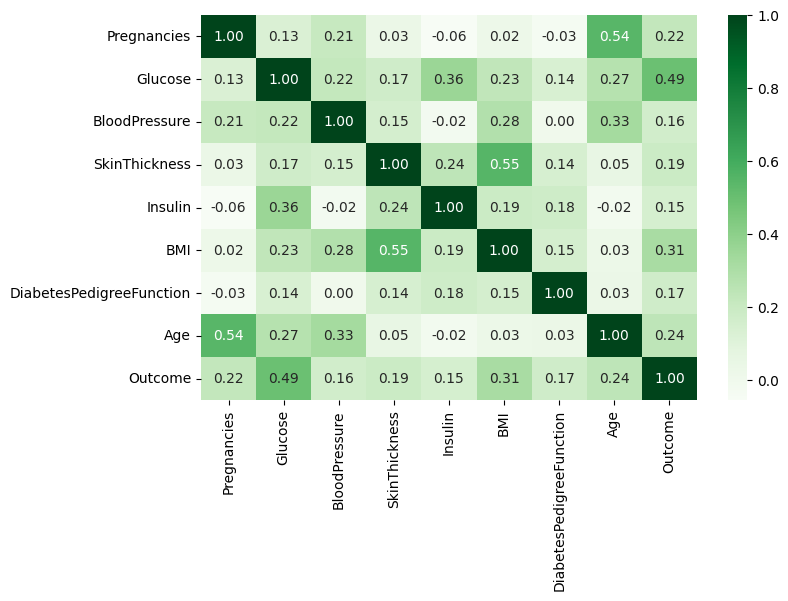

In [ ]:
# Exploratory data analysis
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "Greens")


In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.172361,0.357081,0.231469,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.152458,-0.022049,0.281232,0.000371,0.326740,0.162986
SkinThickness,0.032568,0.172361,0.152458,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357081,-0.022049,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231469,0.281232,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<ipython-input-19-c27a57885c47>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1],
<ipython-input-19-c27a57885c47>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0],


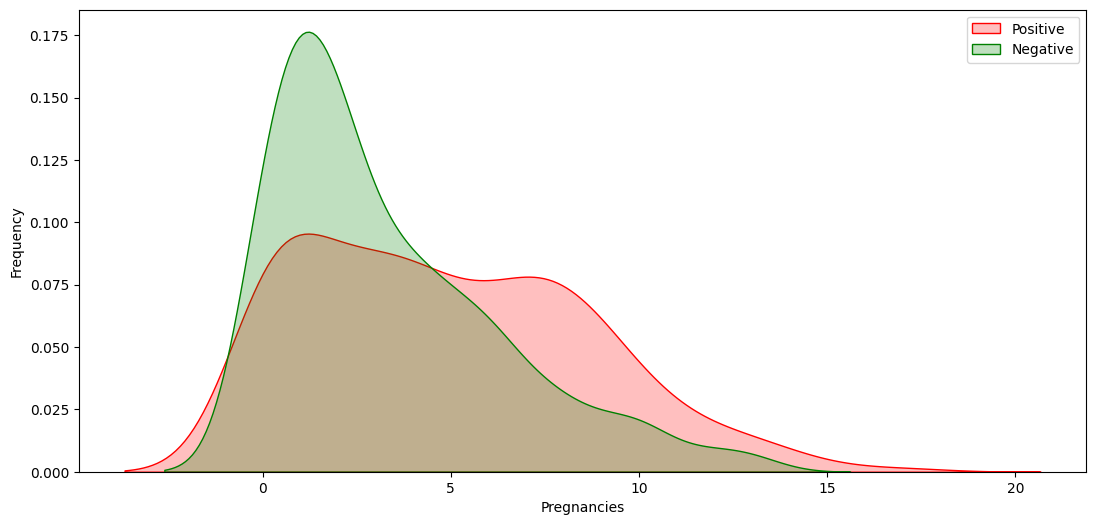

In [ ]:
# Explore Pregnancies vs Outcome
plt.figure(figsize=(13,6))
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1],
    color="Red", shade = True)
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0],
    ax =g, color="Green", shade= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])



<Axes: xlabel='Outcome', ylabel='count'>

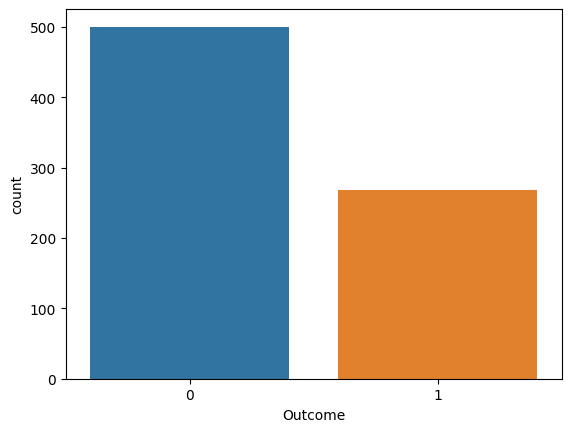

In [ ]:
# outcome has 1 and 0 values
# 1 indicates positive
# 0 indicates negative
sns.countplot(x=df['Outcome'])


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.groupby('Outcome').mean() # grouping the people by mean of values


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.705367,70.810008,26.058000,83.188000,30.880200,0.429734,31.190000
1,4.865672,142.159661,74.950326,29.716418,116.041045,35.381343,0.550500,37.067164


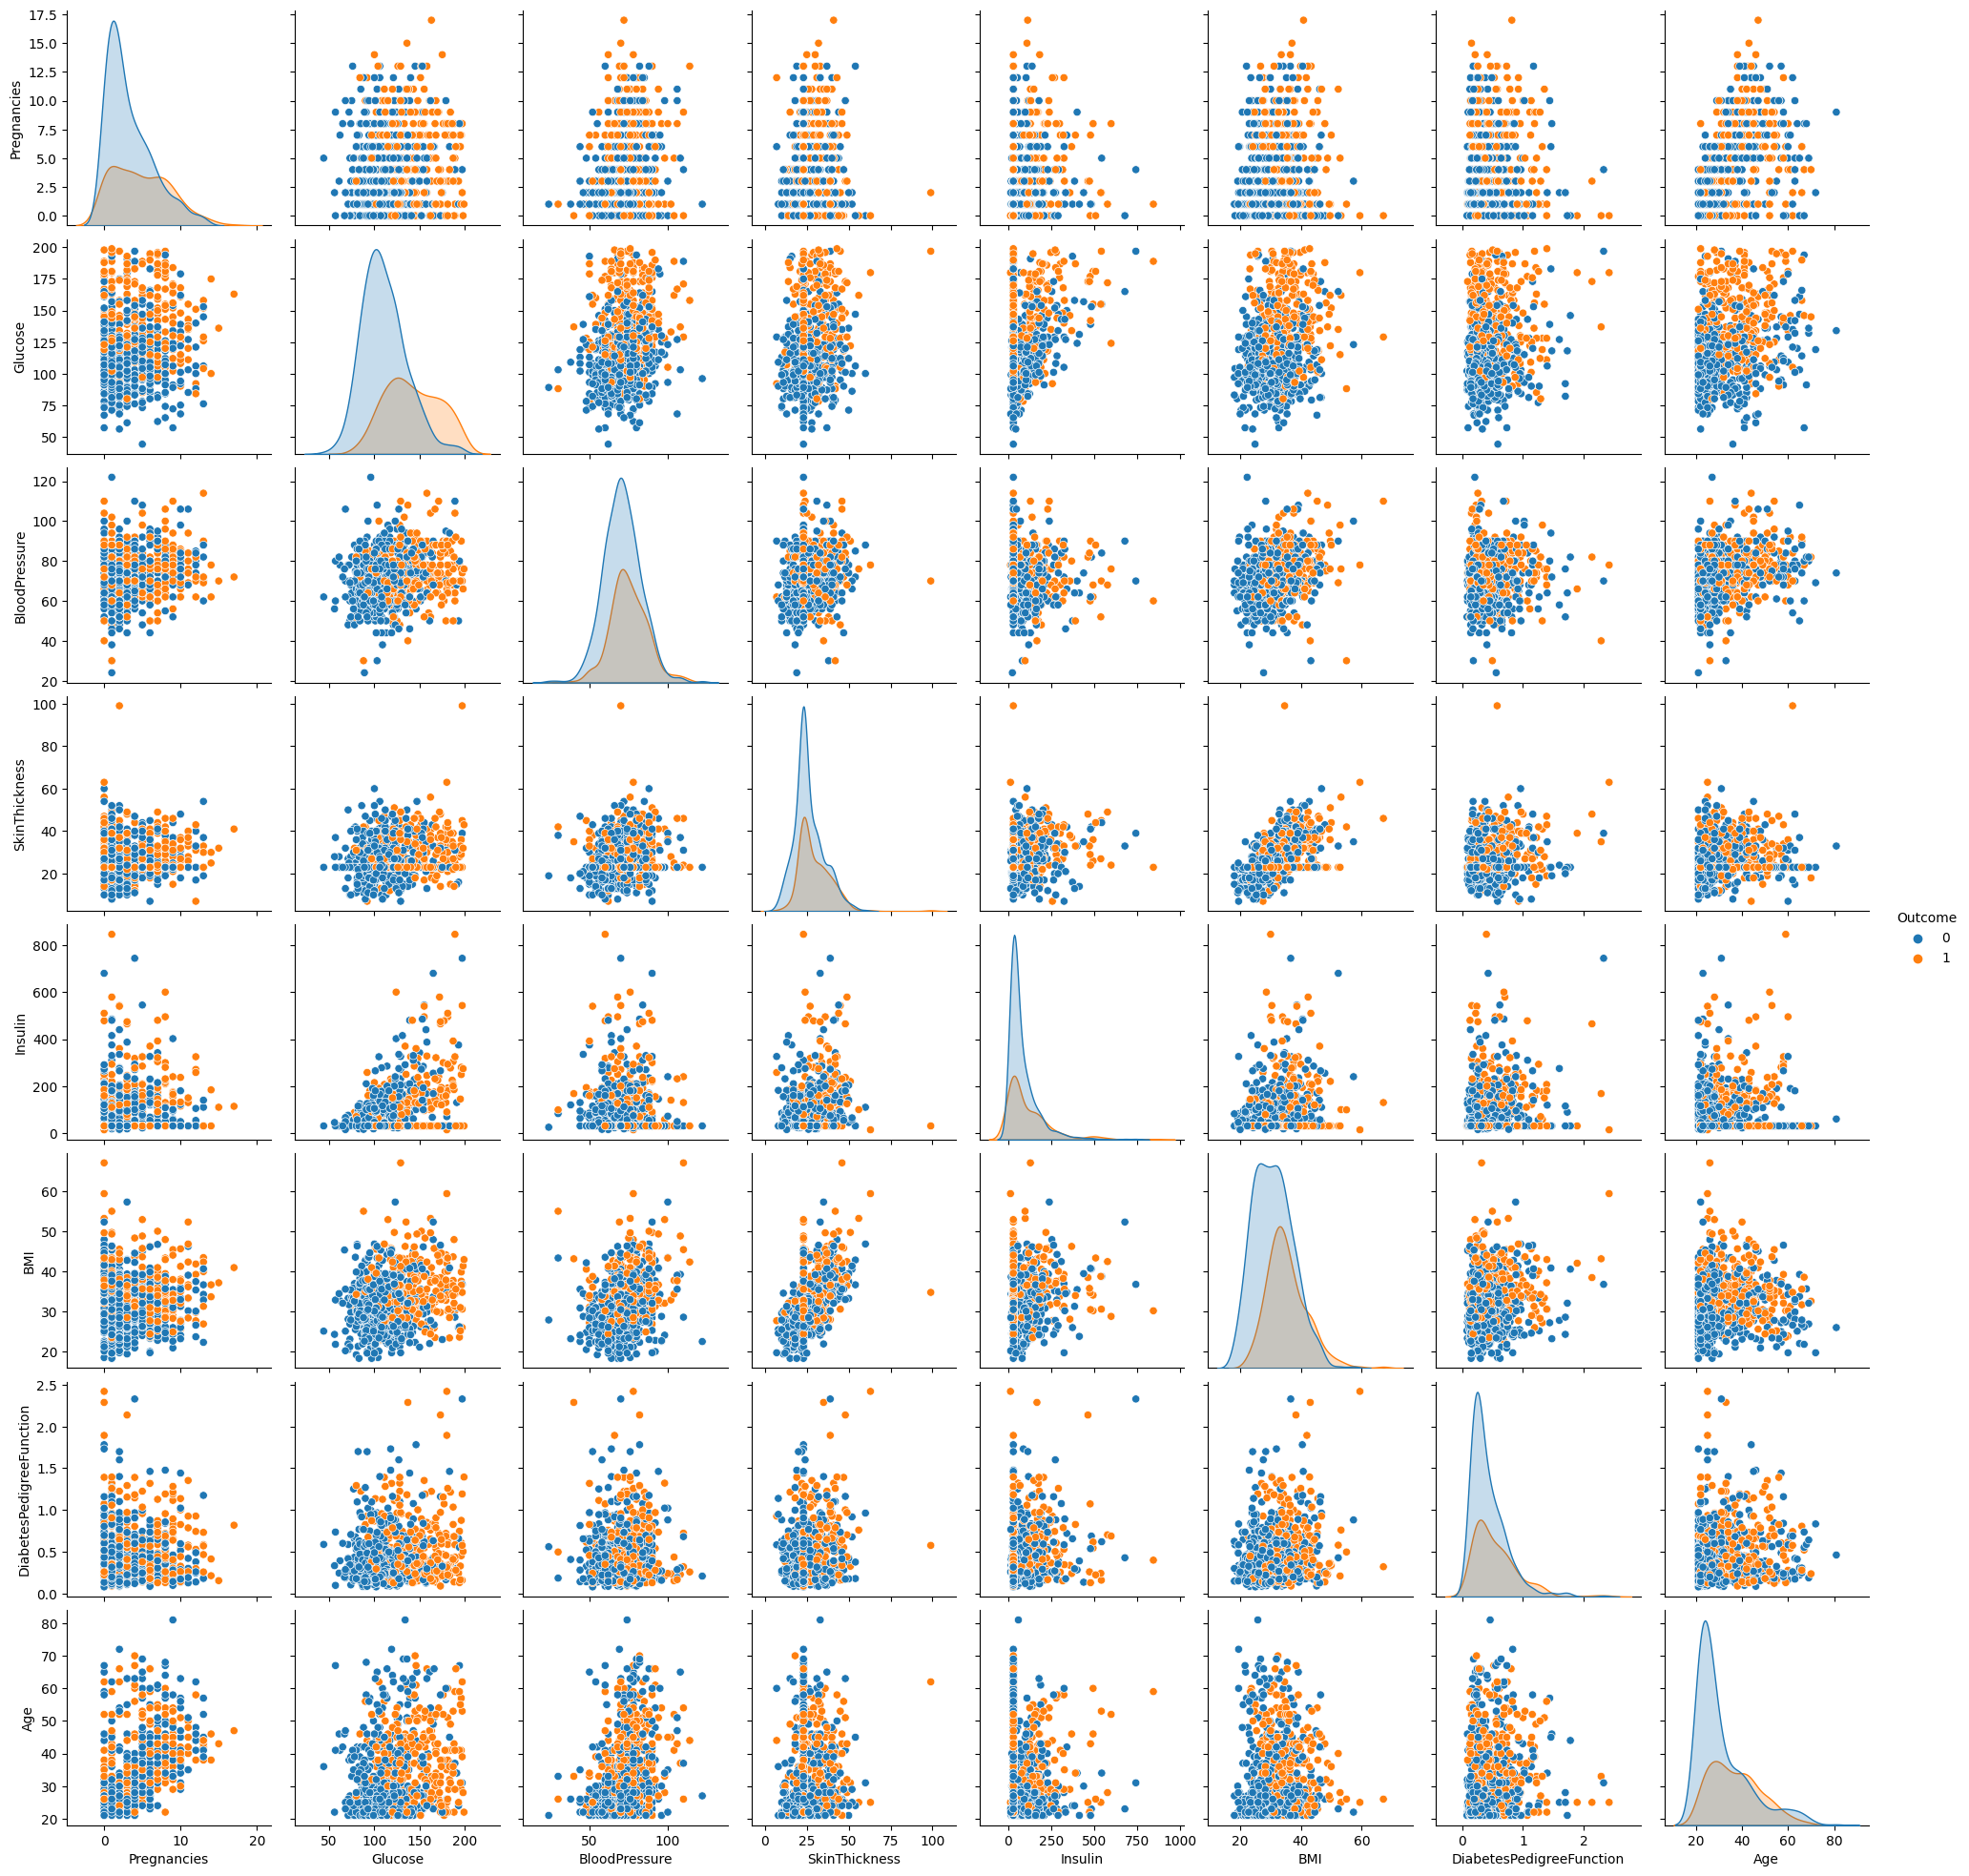

In [ ]:
sns.pairplot(df, hue= 'Outcome',vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']) # pair plot in dataset of outcome with all columns


In [ ]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


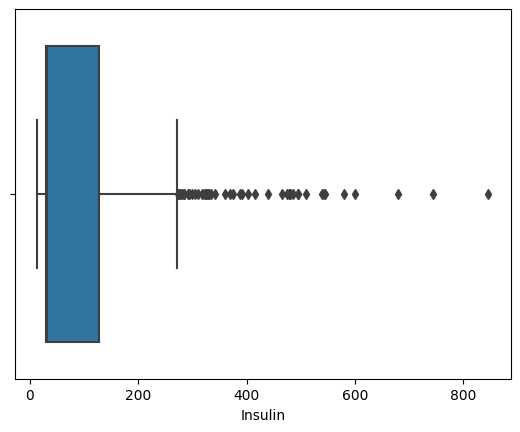

In [ ]:
# The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
sns.boxplot(x = df["Insulin"]);

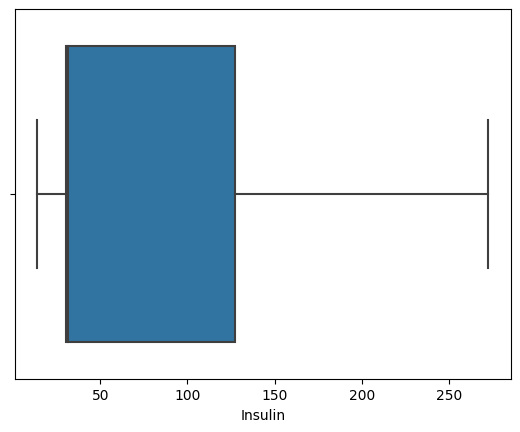

In [ ]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper
sns.boxplot(x = df["Insulin"]);


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-2.97833873, -2.13812857, -2.08004061, -2.07164162, -1.85239939,
       -1.84620717, -1.81951148, -1.81547501, -1.75035734, -1.74379618,
       -1.74124408, -1.72551826, -1.72366681, -1.71639102, -1.61537791,
       -1.61178248, -1.60541668, -1.56976852, -1.56525664, -1.5466146 ,
       -1.52468978, -1.52075927, -1.50902437, -1.50546835, -1.50310522,
       -1.49949252, -1.48775564, -1.47998361, -1.47411255, -1.46775757])

In [ ]:
threshold = np.sort(df_scores)[7]
threshold

-1.8154750080516624

In [ ]:
outlier = df_scores > threshold
df = df[outlier]

In [ ]:
# The size of the data set was examined.
df.shape

(760, 9)

In [ ]:
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,30.500,33.6,0.627,50,1
1,1,85.0,66.000000,29,30.500,26.6,0.351,31,0
2,8,183.0,64.000000,23,30.500,23.3,0.672,32,1
3,1,89.0,66.000000,23,94.000,28.1,0.167,21,0
4,0,137.0,40.000000,35,168.000,43.1,2.288,33,1
5,5,116.0,74.000000,23,30.500,25.6,0.201,30,0
6,3,78.0,50.000000,32,88.000,31.0,0.248,26,1
7,10,115.0,69.105469,23,30.500,35.3,0.134,29,0
8,2,197.0,70.000000,45,272.375,30.5,0.158,53,1
9,8,125.0,96.000000,23,30.500,32.0,0.232,54,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']


In [ ]:
df = pd.DataFrame(X)
cols = df.columns
index = df.index

In [ ]:
print(X)

[[ 0.6         0.775       0.         ...  0.17777778  0.66970684
   1.23529412]
 [-0.4        -0.8        -0.375      ... -0.6        -0.0495114
   0.11764706]
 [ 1.          1.65       -0.5        ... -0.96666667  0.78697068
   0.17647059]
 ...
 [ 0.4         0.1         0.         ... -0.64444444 -0.3257329
   0.05882353]
 [-0.4         0.225      -0.75       ... -0.21111111 -0.05472313
   1.05882353]
 [-0.4        -0.6        -0.125      ... -0.17777778 -0.14332248
  -0.35294118]]


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 760, dtype: int64


In [ ]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)


In [ ]:
print(X)

       0      1      2         3         4         5         6         7
0    0.6  0.775  0.000  1.333333 -0.007595  0.177778  0.669707  1.235294
1   -0.4 -0.800 -0.375  0.666667 -0.007595 -0.600000 -0.049511  0.117647
2    1.0  1.650 -0.500  0.000000 -0.007595 -0.966667  0.786971  0.176471
3   -0.4 -0.700 -0.375  0.000000  0.635443 -0.433333 -0.528990 -0.470588
4   -0.6  0.500 -2.000  1.333333  1.384810  1.233333  4.998046  0.235294
..   ...    ...    ...       ...       ...       ...       ...       ...
755  1.4 -0.400  0.250  2.777778  1.506329  0.100000 -0.518567  2.000000
756 -0.2  0.125 -0.125  0.444444 -0.007595  0.533333 -0.078176 -0.117647
757  0.4  0.100  0.000  0.000000  0.817722 -0.644444 -0.325733  0.058824
758 -0.4  0.225 -0.750  0.000000 -0.007595 -0.211111 -0.054723  1.058824
759 -0.4 -0.600 -0.125  0.888889 -0.007595 -0.177778 -0.143322 -0.352941

[760 rows x 8 columns]


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 760, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(760, 8) (608, 8) (152, 8)


Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7861842105263158


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.75


In [ ]:
from sklearn.preprocessing import RobustScaler
import numpy as np

# Create a RobustScaler instance
scaler = RobustScaler()

# Define the input data as a tuple
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Convert the input_data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Assuming you have a training dataset 'X_train' to fit the scaler
# Fit the 'scaler' with your training data
scaler.fit(X_train)

# Standardize the input data using the fitted 'scaler'
std_data = scaler.transform(input_data_reshaped)

# Continue with making predictions
prediction = classifier.predict(std_data)


# Interpret the prediction
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

The person is diabetic
